In [7]:
import pandas as pd
import numpy as np
import mlcrate as mlc
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_train = pd.read_csv('train.csv', nrows=10000000)
df_test = pd.read_csv('test.csv', nrows=10000000)

print("Sample view of Training Set: ")
display(df_train.head())
print("Sample view of Testing Set: ")
display(df_test.head())

Sample view of Training Set: 


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


Sample view of Testing Set: 


,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


Column Description:
    - ip: ip address of click
    - app: app id for marketing
    - device: device type if of user mobile phone
    - os: os version id of user mobile phone
    - channel: channel id of mobile ad publisher
    - click_time: timestamp of click (UTC)
    - attribute_time: if user download the app for after clicking an ad, this is the time of the app download
    - is_attributed: the target that is to be predicted, indicating the app was downloaded
    
Notes:
    - The data are all encoded with ID numbers instead of actual meanings
    - The attributed_time variable only exists in the training set

Overview of number of unique values in df_train:


/usr/local/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


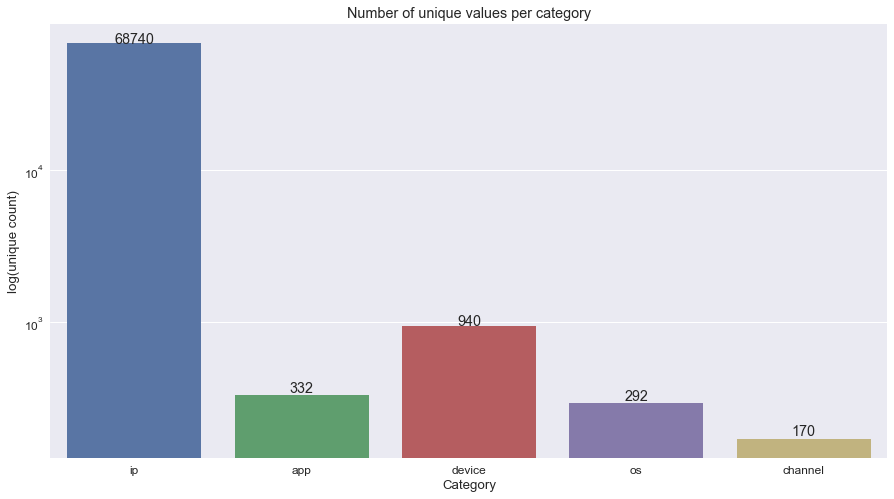

In [8]:
print("Overview of number of unique values in df_train:")
#df_train[['ip','app','device','os','channel']].nunique().plot(kind='bar',
#        title='Number of distinct values in each category', logy=True, figsize=[10,6])
plt.figure(figsize=(15, 8))
cols = ['ip', 'app', 'device', 'os', 'channel']
uniques = [len(df_train[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, palette=sns.color_palette(), log=True)
ax.set(xlabel='Category', ylabel='log(unique count)', title='Number of unique values per category')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+10, uniq, ha='center')


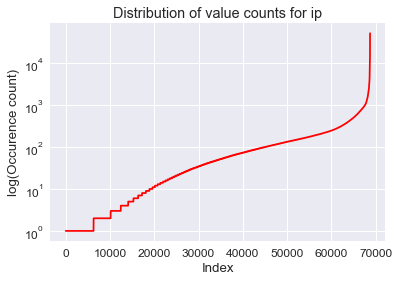

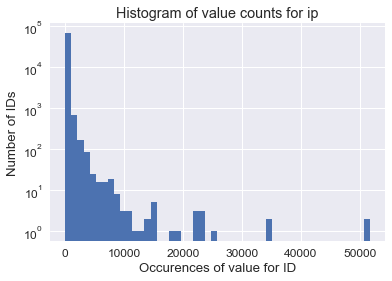

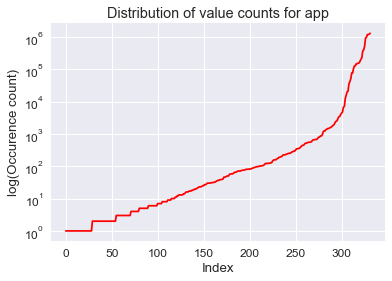

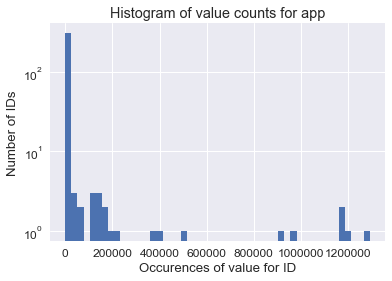

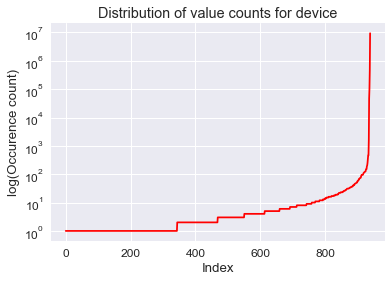

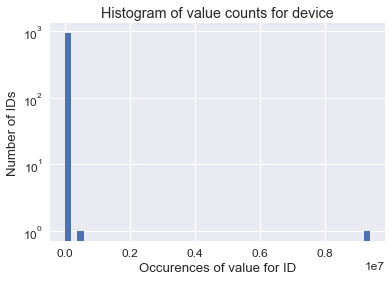

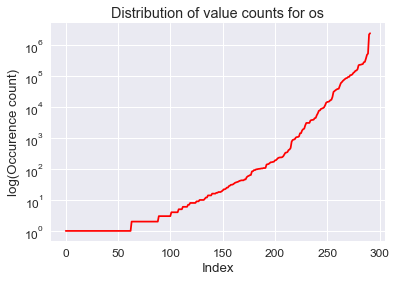

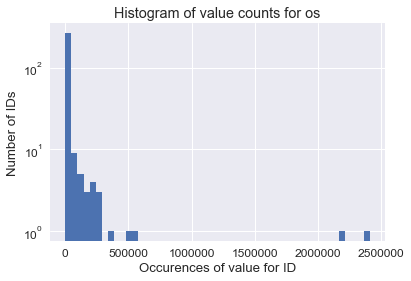

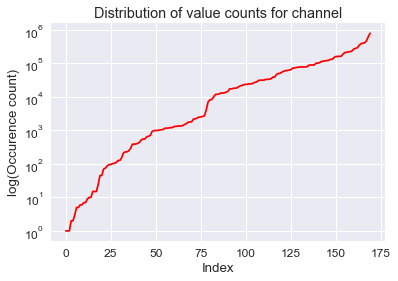

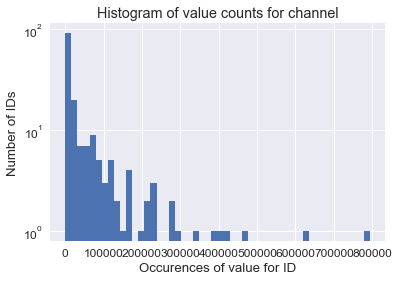

In [9]:
for col, uniq in zip(cols, uniques):
    counts = df_train[col].value_counts()

    sorted_counts = np.sort(counts.values)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    line, = ax.plot(sorted_counts, color='red')
    ax.set_yscale('log')
    plt.title("Distribution of value counts for {}".format(col))
    plt.ylabel('log(Occurence count)')
    plt.xlabel('Index')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(sorted_counts, bins=50)
    ax.set_yscale('log', nonposy='clip')
    plt.title("Histogram of value counts for {}".format(col))
    plt.ylabel('Number of IDs')
    plt.xlabel('Occurences of value for ID')
    plt.show()

What we are trying to predict:

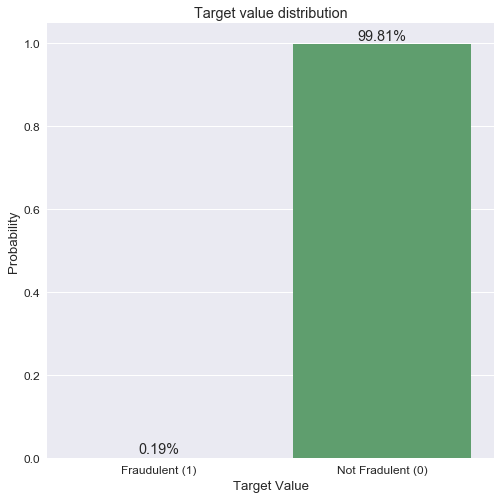

In [10]:
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
mean = (df_train.is_attributed.values == 1).mean()
ax = sns.barplot(['Fraudulent (1)', 'Not Fradulent (0)'], [mean, 1-mean], palette=sns.color_palette())
ax.set(xlabel='Target Value', ylabel='Probability', title='Target value distribution')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center") 